# Machine Learning For UK Data

In [1]:
#Setting up the environment for data analysis and visualization, configuring display settings, and handling warnings by importing all necessary libraries
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
sns.set_context('talk')
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the Transport data cleaned in the other jupyternotebook for analysis of ML only for UK
transport_data = pd.read_csv("transport_data.csv")

# MACHINE LEARNING
This process involves:
- Encoding the categorical Variables
- Creating the features and dependent variable objects
- Standardising the data
- Normalizing the data
- splitting the data into training and Test set.
- build various ML models
- test the model on a test data set
- Evaluate the model performance
- Maximize the model performance
- Hyperparameter tuning

In [3]:
transport_data = transport_data[transport_data['geo'] == 'UK']

# Reset index
transport_data.reset_index(drop=True, inplace=True)


In [4]:
transport_data.isnull().sum()

tra_cov                 0
aircraft                0
distance                0
geo                     0
TIME_PERIOD             0
Number of Passengers    0
Number of Flights       0
dtype: int64

In [5]:
#Drop variables that will not be used in any analysis process
column_to_drop = ['geo']
transport_data.drop(column_to_drop, axis=1, inplace=True)

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing

## Encoding Data Using One Hot Encoding

In [7]:
#Apply OneHotEncoder to multiple columns
encoder = OneHotEncoder(sparse=False, drop='first')  
encoded = encoder.fit_transform(transport_data[['tra_cov', 'aircraft','distance']])

#Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['tra_cov', 'aircraft','distance']))

#Concatenate the encoded DataFrame with the original DataFrame
result_df = pd.concat([transport_data, encoded_df], axis=1)

#Display the result
print(result_df)

    tra_cov aircraft     distance  TIME_PERIOD  Number of Passengers  \
0      INTL    AC_JJ  KM1000-1499         2008               3083938   
1      INTL    AC_JJ  KM1000-1499         2009               2049461   
2      INTL    AC_JJ  KM1000-1499         2010               1582968   
3      INTL    AC_JJ  KM1000-1499         2011               1198971   
4      INTL    AC_JJ  KM1000-1499         2012                976359   
..      ...      ...          ...          ...                   ...   
775     NAT    AC_WJ     KM_LT300         2016                  5688   
776     NAT    AC_WJ     KM_LT300         2017                  3746   
777     NAT    AC_WJ     KM_LT300         2018                  3793   
778     NAT    AC_WJ     KM_LT300         2019                 29784   
779     NAT    AC_WJ     KM_LT300         2020                 17593   

     Number of Flights  tra_cov_NAT  aircraft_AC_NJ  aircraft_AC_RJ  \
0                18858          0.0             0.0             

In [8]:
#View the dataframe
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tra_cov               780 non-null    object 
 1   aircraft              780 non-null    object 
 2   distance              780 non-null    object 
 3   TIME_PERIOD           780 non-null    int64  
 4   Number of Passengers  780 non-null    int64  
 5   Number of Flights     780 non-null    int64  
 6   tra_cov_NAT           780 non-null    float64
 7   aircraft_AC_NJ        780 non-null    float64
 8   aircraft_AC_RJ        780 non-null    float64
 9   aircraft_AC_RT        780 non-null    float64
 10  aircraft_AC_WJ        780 non-null    float64
 11  distance_KM1500-1999  780 non-null    float64
 12  distance_KM300-499    780 non-null    float64
 13  distance_KM500-999    780 non-null    float64
 14  distance_KM_GE2000    780 non-null    float64
 15  distance_KM_LT300     7

In [9]:
#Create a list of features to drop
column_to_drop = ['tra_cov', 'aircraft', 'distance']
result_df.drop(column_to_drop, axis=1, inplace=True)

In [10]:
#View if the columns have been dropped
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TIME_PERIOD           780 non-null    int64  
 1   Number of Passengers  780 non-null    int64  
 2   Number of Flights     780 non-null    int64  
 3   tra_cov_NAT           780 non-null    float64
 4   aircraft_AC_NJ        780 non-null    float64
 5   aircraft_AC_RJ        780 non-null    float64
 6   aircraft_AC_RT        780 non-null    float64
 7   aircraft_AC_WJ        780 non-null    float64
 8   distance_KM1500-1999  780 non-null    float64
 9   distance_KM300-499    780 non-null    float64
 10  distance_KM500-999    780 non-null    float64
 11  distance_KM_GE2000    780 non-null    float64
 12  distance_KM_LT300     780 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 79.3 KB


### Findings
- The columns have been dropped

# Fitting Model without Feature Scaling

In [11]:
#Split into dependent and independent variables
y = result_df.iloc[:, 1].values
X = result_df.drop(['Number of Passengers'], axis=1).values

In [12]:
#View the dependent variable
print(y)

[ 3083938  2049461  1582968  1198971   976359   872069   896281   675558
   610891   674159   592230   502257    75403  3401491  2731438  2181633
  2347447  2094227  1845145  1684169  1522954  1493345  1614520  1505972
  1242450   107071    20427    22661    47151     6404     3481     2263
     3435     2068     1179     1581     1103      698        0   401476
   237169   209999   227353   199899   205520   176399   117108   120240
   120736   111786    77976    35783 10226737  9527345 10581329 11292004
 11086880 10992964 11239633 11950248 12934729 14395703 13428009 12342174
  2432245      471       33      479     1221      451      165        0
       96        0      206      125      164       71 32200279 29857328
 28392481 30829365 32210918 33791476 35605242 39205080 43445039 45886998
 47028326 47953492 10434038 21292751 19434402 18792907 20182487 20492881
 22394942 23940336 25568728 29502780 33285983 33455502 34539131  7310203
 15120156 13355816 11842267 12446807 12304082 12836

In [13]:
#View the independent variable
print(X)

[[2.0080e+03 1.8858e+04 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0090e+03 1.2970e+04 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0100e+03 8.9330e+03 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [2.0180e+03 4.3000e+01 1.0000e+00 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [2.0190e+03 1.9700e+02 1.0000e+00 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [2.0200e+03 1.5400e+02 1.0000e+00 ... 0.0000e+00 0.0000e+00 1.0000e+00]]


In [14]:
#View the shape of x and y
X.shape, y.shape

((780, 12), (780,))

In [15]:
#Split the data into features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
#View the shape of the split data
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((624, 12), (156, 12), (624,), (156,))

# Linear Regression

In [17]:
#Import LinearRegression from sklearn library
from sklearn.linear_model import LinearRegression

#Initialise an object slr by calling a method named as 'LinearRegression()'
mlr = LinearRegression()

#Fitting the OLS model
mlr.fit(X_train, y_train)

# Predict the results for the training and testing
y_train_pred = mlr.predict(X_train)
y_test_pred = mlr.predict(X_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(mlr.score(X_train, y_train)))

print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(mlr.score(X_test, y_test)))

-----Training set statistics-----
R-squared of the model in training set is: 0.9557723805982009
-----Test set statistics-----
R-squared of the model in test set is: 0.9509922749993647


### Coefficients of Independent variables

In [18]:
#Print the coefficients of the independent variables
print(mlr.coef_)

[ 6.25373258e+04  1.49393994e+02 -5.41711925e+05 -1.18479993e+06
 -1.52108034e+06 -2.19799917e+06  5.75386971e+05  3.95133200e+05
 -1.45415761e+06 -1.58310260e+06  2.38442922e+06 -5.44536408e+05]


# Decision Tree Regression

In [19]:
#Import DecisionTreeRegressor from the sklearn library
from sklearn.tree import DecisionTreeRegressor

#Initialise an object by calling a method DecisionTreeRegressor()
decision_Regressor = DecisionTreeRegressor(max_depth=2, random_state=0)  # You can adjust max_depth as needed

#Pass the training set through the decision_Regressor
decision_Regressor.fit(X_train, y_train)

#Predict the X_test values
y_pred_decision=decision_Regressor.predict(X_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(decision_Regressor.score(X_train, y_train)))

print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(decision_Regressor.score(X_test, y_test)))

-----Training set statistics-----
R-squared of the model in training set is: 0.9406329566122515
-----Test set statistics-----
R-squared of the model in test set is: 0.9261873045057107


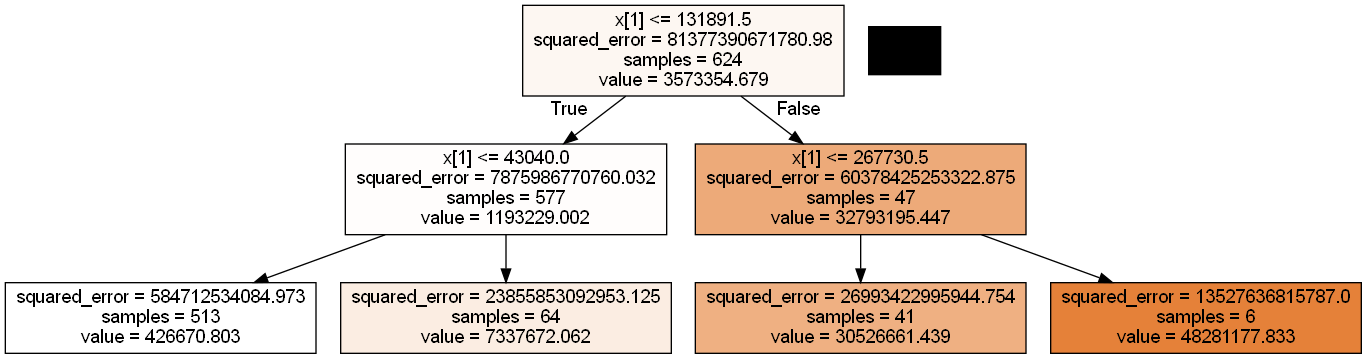

In [20]:
#Visualize the Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import pydotplus  # You need to import this library to work with Graphviz
from IPython.display import Image
from sklearn import tree
from io import StringIO

#Create a StringIO object to hold the visualization
dot_data = StringIO()

#Export the Decision Tree as a Graphviz dot file
export_graphviz(decision_Regressor, out_file=dot_data, filled=True)

#Use pydotplus to create an image from the dot file
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#Create an Image from the graph
Image(graph.create_png())

# Random Forest Regression

In [21]:
#Import RandomForestRegressor from sklearn
from sklearn.ensemble import RandomForestRegressor

#Create an object forest by calling a method RandomForestRegressor()
forest_Regressor = RandomForestRegressor(n_estimators = 1000,random_state=0)

#Train the Model by calling a fit() method
forest_Regressor.fit(X_train, y_train)

#Predict the Test Set
y_pred_random = forest_Regressor.predict(X_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(forest_Regressor.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(forest_Regressor.score(X_test, y_test)))

-----Training set statistics-----
R-squared of the model in training set is: 0.998740487069524
-----Test set statistics-----
R-squared of the model in test set is: 0.9893952451641765


# Ridge Regression

In [22]:
#Import Ridge from sklearn library
from sklearn.linear_model import Ridge

#Train the Ridge() mode by calling a fit() method
ridge = Ridge().fit(X_train, y_train)

#Predict the Test Set
y_pred_ridge = ridge.predict(X_test)


#Display the score by using ridge object
print("-----Training set statistics-----")
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))

print("-----Test set statistics (ridge)-----")
print("R-squared of the model in test set is: {}".format(ridge.score(X_test, y_test)))

#Alpha = 10 is a parameter using a fit() method
ridge_10 = Ridge(alpha = 10).fit(X_train, y_train)

#Predict the Test Set
y_pred_ridge_10 = ridge.predict(X_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("Training set score: {:.2f}".format(ridge_10.score(X_train, y_train)))

print("-----Test set statistics (ridge_10)-----")
print("R-squared of the model in test set is: {}".format(ridge_10.score(X_test, y_test)))


#Alpha = 0.1 is a parameter using a fit() method
ridge_01 = Ridge(alpha = 0.1).fit(X_train, y_train)

#Predict the Test Set
y_pred_ridge_01 = ridge.predict(X_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("Training set score: {:.2f}".format(ridge_01.score(X_train, y_train)))

print("-----Test set statistics (ridge_01)-----")
print("R-squared of the model in test set is: {}".format(ridge_01.score(X_test, y_test)))

-----Training set statistics-----
Training set score: 0.96
-----Test set statistics (ridge)-----
R-squared of the model in test set is: 0.9510249589037737
-----Training set statistics-----
Training set score: 0.96
-----Test set statistics (ridge_10)-----
R-squared of the model in test set is: 0.950963658745005
-----Training set statistics-----
Training set score: 0.96
-----Test set statistics (ridge_01)-----
R-squared of the model in test set is: 0.9509960697997634


# Using GridSearchCV for parameter optimization in Ridge Regression

In [23]:
#Import GridSearchCV from sklearn library
from sklearn.model_selection import GridSearchCV

#Using GridSearch for parameter optimization
ridgeregr = GridSearchCV(Ridge(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1]
                    }, verbose=1)

ridgeregr.fit(X_train, y_train)

ridge = ridgeregr.best_estimator_

#Making the prediction for the test and training set 
y_train_pred = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(ridge.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge.score(X_test, y_test)))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
-----Training set statistics-----
R-squared of the model in training set is: 0.9557660482037577
-----Test set statistics-----
R-squared of the model in test set is: 0.9510249589037737


# Lasso Regression

In [24]:
#Import Lasso from sklearn library
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)

#prediction the training and test values
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

#Print the R-squared values
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

#we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)

#Print the R-squared values
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

#Print the R-squared values
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.96
Test set score: 0.95
Number of features used: 12
Training set score: 0.96
Test set score: 0.95
Number of features used: 12
Training set score: 0.96
Test set score: 0.95
Number of features used: 12


# Using GridSearch Parameter optimization in Lasso Regression

In [25]:
#Using GridSearch for parameter optimization
lassoregr = GridSearchCV(Lasso(),
                    param_grid={
                        'alpha': [0.01, 0.0001, 1]
                    }, verbose=1)

lassoregr.fit(X_train, y_train)

lasso = lassoregr.best_estimator_

#Make predictions for test and training sets
y_preds_train = lasso.predict(X_train)
y_preds_test_lasso = lasso.predict(X_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(lasso.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso.score(X_test, y_test)))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
-----Training set statistics-----
R-squared of the model in training set is: 0.9557723805971812
-----Test set statistics-----
R-squared of the model in test set is: 0.9509923054668111


# ElasticNet Regression

In [26]:
#Import ElasticNet from sklearn library
from sklearn.linear_model import ElasticNet

#Train the model
e_net = ElasticNet(alpha = 0.01)

#Fit the e_net model
e_net.fit(X_train, y_train)

#Calculate the prediction and mean square error
y_pred_elastic = e_net.predict(X_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)

#Print the mean square error, the coefficients and the intercept
print("Mean Squared Error on test set", mean_squared_error)
print(e_net.coef_, e_net.intercept_)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(e_net.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(e_net.score(X_test, y_test)))

Mean Squared Error on test set 4082762468308.9287
[ 6.21661721e+04  1.49171917e+02 -5.39874748e+05 -1.04676538e+06
 -1.39167789e+06 -2.04871142e+06  6.50745469e+05  3.98630374e+05
 -1.39523407e+06 -1.51100053e+06  2.33699494e+06 -5.11019341e+05] -124488262.60892825
-----Training set statistics-----
R-squared of the model in training set is: 0.9557170737158059
-----Test set statistics-----
R-squared of the model in test set is: 0.9510606468577267


# Support Vector Machine Regression

In [27]:
#Import SVR from sklearn library
from sklearn.svm import SVR
svr= SVR()

#fit the svr 
svr.fit(X_train, y_train)

#Print the R-squared values
print("Training set score: {:.2f}".format(svr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(svr.score(X_test, y_test)))

Training set score: -0.15
Test set score: -0.14


# Support Vector Machine Regression using GridSearchCV

In [28]:
#Find best hyper parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.01,1,0.1,10,100,1000],'gamma':[0.01,0.1,0.01,0.001,0.001, 1], 'kernel':['rbf']}
grid = GridSearchCV(SVR(),param_grid,verbose = 4)
grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(grid.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(grid.score(X_test, y_test)))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ...C=0.01, gamma=0.01, kernel=rbf;, score=-0.171 total time=   0.0s
[CV 2/5] END ...C=0.01, gamma=0.01, kernel=rbf;, score=-0.123 total time=   0.0s
[CV 3/5] END ...C=0.01, gamma=0.01, kernel=rbf;, score=-0.115 total time=   0.0s
[CV 4/5] END ...C=0.01, gamma=0.01, kernel=rbf;, score=-0.162 total time=   0.0s
[CV 5/5] END ...C=0.01, gamma=0.01, kernel=rbf;, score=-0.173 total time=   0.0s
[CV 1/5] END ....C=0.01, gamma=0.1, kernel=rbf;, score=-0.171 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=0.1, kernel=rbf;, score=-0.123 total time=   0.0s
[CV 3/5] END ....C=0.01, gamma=0.1, kernel=rbf;, score=-0.115 total time=   0.0s
[CV 4/5] END ....C=0.01, gamma=0.1, kernel=rbf;, score=-0.162 total time=   0.0s
[CV 5/5] END ....C=0.01, gamma=0.1, kernel=rbf;, score=-0.173 total time=   0.0s
[CV 1/5] END ...C=0.01, gamma=0.01, kernel=rbf;, score=-0.171 total time=   0.0s
[CV 2/5] END ...C=0.01, gamma=0.01, kernel=rbf;

[CV 2/5] END .....C=10, gamma=0.01, kernel=rbf;, score=-0.123 total time=   0.0s
[CV 3/5] END .....C=10, gamma=0.01, kernel=rbf;, score=-0.115 total time=   0.0s
[CV 4/5] END .....C=10, gamma=0.01, kernel=rbf;, score=-0.162 total time=   0.0s
[CV 5/5] END .....C=10, gamma=0.01, kernel=rbf;, score=-0.173 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.171 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.123 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.115 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.162 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.173 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.171 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.123 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.115 total time=   0.0s
[CV 4/5] END ....C=10, gamma

# K-Nearest Neighbors Regression

In [29]:
#Import KNeighborsRegressor from sklearn library
from sklearn.neighbors import KNeighborsRegressor
knn_Regressor = KNeighborsRegressor(algorithm='auto', leaf_size=30,metric='minkowski',
                                   metric_params=None, n_jobs=1, n_neighbors=5)
knn_Regressor.fit(X_train, y_train)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(knn_Regressor.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(knn_Regressor.score(X_test, y_test)))

-----Training set statistics-----
R-squared of the model in training set is: 0.9671684023019903
-----Test set statistics-----
R-squared of the model in test set is: 0.9505214439061268


# Fitting Data with Normalization

In [30]:
#View the Data
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TIME_PERIOD           780 non-null    int64  
 1   Number of Passengers  780 non-null    int64  
 2   Number of Flights     780 non-null    int64  
 3   tra_cov_NAT           780 non-null    float64
 4   aircraft_AC_NJ        780 non-null    float64
 5   aircraft_AC_RJ        780 non-null    float64
 6   aircraft_AC_RT        780 non-null    float64
 7   aircraft_AC_WJ        780 non-null    float64
 8   distance_KM1500-1999  780 non-null    float64
 9   distance_KM300-499    780 non-null    float64
 10  distance_KM500-999    780 non-null    float64
 11  distance_KM_GE2000    780 non-null    float64
 12  distance_KM_LT300     780 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 79.3 KB


Normalize the X variable Number of Flights

In [31]:
from sklearn.preprocessing import MinMaxScaler

#Create the minmaxscaler object
scaler = MinMaxScaler()
result_df['Number of Flights Scaled'] = scaler.fit_transform(result_df[['Number of Flights']])

In [32]:
#View Result_df
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TIME_PERIOD               780 non-null    int64  
 1   Number of Passengers      780 non-null    int64  
 2   Number of Flights         780 non-null    int64  
 3   tra_cov_NAT               780 non-null    float64
 4   aircraft_AC_NJ            780 non-null    float64
 5   aircraft_AC_RJ            780 non-null    float64
 6   aircraft_AC_RT            780 non-null    float64
 7   aircraft_AC_WJ            780 non-null    float64
 8   distance_KM1500-1999      780 non-null    float64
 9   distance_KM300-499        780 non-null    float64
 10  distance_KM500-999        780 non-null    float64
 11  distance_KM_GE2000        780 non-null    float64
 12  distance_KM_LT300         780 non-null    float64
 13  Number of Flights Scaled  780 non-null    float64
dtypes: float64

In [33]:
#Create dependent and independent variables from normalized data
y_minmax = result_df.iloc[:, 1].values
X_minmax = result_df.drop(['Number of Passengers','Number of Flights'], axis=1).values

In [34]:
#View the y_minmax variable 
print(y_minmax)

[ 3083938  2049461  1582968  1198971   976359   872069   896281   675558
   610891   674159   592230   502257    75403  3401491  2731438  2181633
  2347447  2094227  1845145  1684169  1522954  1493345  1614520  1505972
  1242450   107071    20427    22661    47151     6404     3481     2263
     3435     2068     1179     1581     1103      698        0   401476
   237169   209999   227353   199899   205520   176399   117108   120240
   120736   111786    77976    35783 10226737  9527345 10581329 11292004
 11086880 10992964 11239633 11950248 12934729 14395703 13428009 12342174
  2432245      471       33      479     1221      451      165        0
       96        0      206      125      164       71 32200279 29857328
 28392481 30829365 32210918 33791476 35605242 39205080 43445039 45886998
 47028326 47953492 10434038 21292751 19434402 18792907 20182487 20492881
 22394942 23940336 25568728 29502780 33285983 33455502 34539131  7310203
 15120156 13355816 11842267 12446807 12304082 12836

In [35]:
#View the X_minmax variable
print(X_minmax)

[[2.00800000e+03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 6.07967606e-02]
 [2.00900000e+03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 4.18142955e-02]
 [2.01000000e+03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.87993139e-02]
 ...
 [2.01800000e+03 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 1.38628736e-04]
 [2.01900000e+03 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 6.35113047e-04]
 [2.02000000e+03 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 4.96484311e-04]]


In [36]:
#View the shape of X_minmax and y_minmax
X_minmax.shape, y_minmax.shape

((780, 12), (780,))

In [37]:
#Split the data into features (X_minmax) and target variable (y_minmax)
X_minmax_train, X_minmax_test, y_minmax_train, y_minmax_test = train_test_split(X_minmax, y_minmax, test_size=0.2)

In [38]:
#View the shapes of the split data
X_minmax_train.shape, X_minmax_test.shape, y_minmax_train.shape, y_minmax_test.shape

((624, 12), (156, 12), (624,), (156,))

# Fit the Regression Models using normalized Data

# Linear Regression Model

In [39]:
#Import LinearRegression from sklearn library
from sklearn.linear_model import LinearRegression

#Initialise an object slr by calling a method named as 'LinearRegression()'
mlr = LinearRegression()

#Fitting the OLS model
mlr.fit(X_minmax_train, y_minmax_train)

# Predict the results for the training and testing
y_train_pred = mlr.predict(X_minmax_train)
y_test_pred = mlr.predict(X_minmax_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(mlr.score(X_minmax_train, y_minmax_train)))

print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(mlr.score(X_minmax_test, y_minmax_test)))

-----Training set statistics-----
R-squared of the model in training set is: 0.9573440852211164
-----Test set statistics-----
R-squared of the model in test set is: 0.9419138659750353


# Decision Tree Regression (Normalized Data)

In [40]:
#Import DecisionTreeRegressor from the sklearn library
from sklearn.tree import DecisionTreeRegressor

#Initialise an object by calling a method DecisionTreeRegressor()
decision_Regressor = DecisionTreeRegressor(max_depth=2, random_state=0)  # You can adjust max_depth as needed

#Pass the training set through the decision_Regressor
decision_Regressor.fit(X_minmax_train, y_minmax_train)

#Predict the X_test values
y_pred_decision=decision_Regressor.predict(X_minmax_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(decision_Regressor.score(X_minmax_train, y_minmax_train)))

print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(decision_Regressor.score(X_minmax_test, y_minmax_test)))

-----Training set statistics-----
R-squared of the model in training set is: 0.9465032977430112
-----Test set statistics-----
R-squared of the model in test set is: 0.8963782661580453


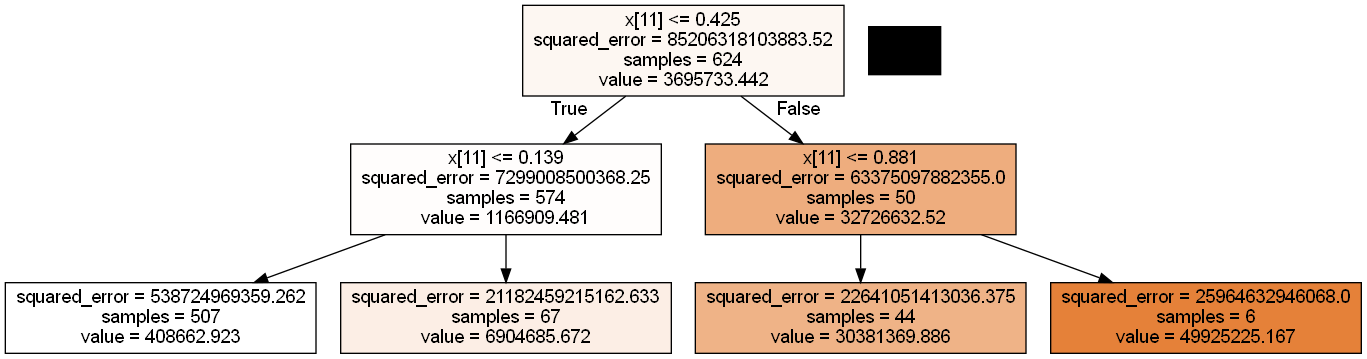

In [41]:
#Visualize the Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import pydotplus  # You need to import this library to work with Graphviz
from IPython.display import Image
from sklearn import tree
from io import StringIO

#Create a StringIO object to hold the visualization
dot_data = StringIO()

#Export the Decision Tree as a Graphviz dot file
export_graphviz(decision_Regressor, out_file=dot_data, filled=True)

#Use pydotplus to create an image from the dot file
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#Create an Image from the graph
Image(graph.create_png())

# Random Forest (Normalized Data)

In [42]:
#Import RandomForestRegressor from sklearn
from sklearn.ensemble import RandomForestRegressor

#Create an object forest by calling a method RandomForestRegressor()
forest_Regressor = RandomForestRegressor(n_estimators = 1000,random_state=0)

#Train the Model by calling a fit() method
forest_Regressor.fit(X_minmax_train, y_minmax_train)

#Predict the Test Set
y_pred_random = forest_Regressor.predict(X_minmax_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(forest_Regressor.score(X_minmax_train, y_minmax_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(forest_Regressor.score(X_minmax_test, y_minmax_test)))

-----Training set statistics-----
R-squared of the model in training set is: 0.9986502720612728
-----Test set statistics-----
R-squared of the model in test set is: 0.9834605244359163


# Ridge Regression with Normalized Data

In [43]:
#Import Ridge from sklearn library
from sklearn.linear_model import Ridge

#Train the Ridge() mode by calling a fit() method
ridge = Ridge().fit(X_minmax_train, y_minmax_train)

#Predict the Test Set
y_pred_ridge = ridge.predict(X_minmax_test)


#Display the score by using ridge object
print("-----Training set statistics-----")
print("Training set score: {:.2f}".format(ridge.score(X_minmax_train, y_minmax_train)))

print("-----Test set statistics (ridge)-----")
print("R-squared of the model in test set is: {}".format(ridge.score(X_minmax_test, y_minmax_test)))

#Alpha = 10 is a parameter using a fit() method
ridge_10 = Ridge(alpha = 10).fit(X_minmax_train, y_minmax_train)

#Predict the Test Set
y_pred_ridge_10 = ridge.predict(X_minmax_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("Training set score: {:.2f}".format(ridge_10.score(X_minmax_train, y_minmax_train)))

print("-----Test set statistics (ridge_10)-----")
print("R-squared of the model in test set is: {}".format(ridge_10.score(X_minmax_test, y_minmax_test)))


#Alpha = 0.1 is a parameter using a fit() method
ridge_01 = Ridge(alpha = 0.1).fit(X_minmax_train, y_minmax_train)

#Predict the Test Set
y_pred_ridge_01 = ridge.predict(X_minmax_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("Training set score: {:.2f}".format(ridge_01.score(X_minmax_train, y_minmax_train)))

print("-----Test set statistics (ridge_01)-----")
print("R-squared of the model in test set is: {}".format(ridge_01.score(X_minmax_test, y_minmax_test)))

-----Training set statistics-----
Training set score: 0.95
-----Test set statistics (ridge)-----
R-squared of the model in test set is: 0.9397995119454362
-----Training set statistics-----
Training set score: 0.86
-----Test set statistics (ridge_10)-----
R-squared of the model in test set is: 0.8377812356666978
-----Training set statistics-----
Training set score: 0.96
-----Test set statistics (ridge_01)-----
R-squared of the model in test set is: 0.9419979793249806


# using GridSearchCV for parameter optimization in Ridge Regression for normalized data

In [44]:
#Import GridSearchCV from sklearn library
from sklearn.model_selection import GridSearchCV

#Using GridSearch for parameter optimization
ridgeregr = GridSearchCV(Ridge(),
                    param_grid={
                        'alpha': [10, 0.1, 1]
                    }, verbose=1)

ridgeregr.fit(X_minmax_train, y_minmax_train)

ridge = ridgeregr.best_estimator_

#Making the prediction for the test and training set 
yminmax_train_pred = ridge.predict(X_minmax_train)
yminmax_test_pred_ridge = ridge.predict(X_minmax_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(ridge.score(X_minmax_train, y_minmax_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge.score(X_minmax_test, y_minmax_test)))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
-----Training set statistics-----
R-squared of the model in training set is: 0.9573128974021675
-----Test set statistics-----
R-squared of the model in test set is: 0.9419979793249806


# Lasso Regression 

In [45]:
#Import Lasso from sklearn library
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_minmax_train, y_minmax_train)

#prediction the training and test values
y_train_pred_lasso = lasso.predict(X_minmax_train)
y_test_pred_lasso = lasso.predict(X_minmax_test)

#Print the R-squared values
print("Training set score: {:.2f}".format(lasso.score(X_minmax_train, y_minmax_train)))
print("Test set score: {:.2f}".format(lasso.score(X_minmax_test, y_minmax_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

#we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01).fit(X_minmax_train, y_minmax_train)

#Print the R-squared values
print("Training set score: {:.2f}".format(lasso001.score(X_minmax_train, y_minmax_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_minmax_test, y_minmax_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

#Print the R-squared values
lasso00001 = Lasso(alpha=0.0001).fit(X_minmax_train, y_minmax_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_minmax_train, y_minmax_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_minmax_test, y_minmax_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.96
Test set score: 0.94
Number of features used: 12
Training set score: 0.96
Test set score: 0.94
Number of features used: 12
Training set score: 0.96
Test set score: 0.94
Number of features used: 12


# Using GridseachCV parameter optimization in Lasso Regression for Normalized data

In [46]:
#Using GridSearch for parameter optimization
lassoregr = GridSearchCV(Lasso(),
                    param_grid={
                        'alpha': [0.0001, 0.01, 1]
                    }, verbose=1)

lassoregr.fit(X_minmax_train, y_minmax_train)

lasso = lassoregr.best_estimator_

#Make predictions for test and training sets
y_preds_train = lasso.predict(X_minmax_train)
y_preds_test_lasso = lasso.predict(X_minmax_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(lasso.score(X_minmax_train, y_minmax_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso.score(X_minmax_test, y_minmax_test)))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
-----Training set statistics-----
R-squared of the model in training set is: 0.9573440852192653
-----Test set statistics-----
R-squared of the model in test set is: 0.9419139406972928


# Elastic Net Regression using Normalized Data

In [47]:
#Import ElasticNet from sklearn library
from sklearn.linear_model import ElasticNet

#Train the model
e_net = ElasticNet(alpha = 0.01)

#Fit the e_net model
e_net.fit(X_minmax_train,y_minmax_train)

#Calculate the prediction and mean square error
y_pred_elastic = e_net.predict(X_minmax_test)
mean_squared_error = np.mean((y_pred_elastic - y_minmax_test)**2)

#Print the mean square error, the coefficients and the intercept
print("Mean Squared Error on test set", mean_squared_error)
print(e_net.coef_, e_net.intercept_)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(e_net.score(X_minmax_train, y_minmax_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(e_net.score(X_minmax_test, y_minmax_test)))

Mean Squared Error on test set 5300525093855.725
[   41480.58101392 -1469856.43660988  1295032.1578644  -1335791.85788307
 -2021851.08238817   499125.68526089   288636.42848717 -1393692.86582491
 -1079184.16454975  2670180.83184231  -889786.7554786  37425916.61874002] -82122204.70512947
-----Training set statistics-----
R-squared of the model in training set is: 0.9380726905407921
-----Test set statistics-----
R-squared of the model in test set is: 0.9218143332418548


# Support Vector Machine Regression for Normalized Data

In [48]:
#Import SVR from sklearn library
from sklearn.svm import SVR
svr= SVR()

#fit the svr 
svr.fit(X_minmax_train,y_minmax_train)

#Print the R-squared values
print("Training set score: {:.2f}".format(svr.score(X_minmax_train,y_minmax_train)))
print("Test set score: {:.2f}".format(svr.score(X_minmax_test,y_minmax_test)))

Training set score: -0.15
Test set score: -0.13


# Support Vector Machine Regression using GridSearchCV for normalized data

In [49]:
#Find best hyper parameters
param_grid = {'C':[0.01,0.1,10,100,1000],'gamma':[0.01,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVR(),param_grid,verbose = 4)
grid.fit(X_minmax_train,y_minmax_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_minmax_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(grid.score(X_minmax_train, y_minmax_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(grid.score(X_minmax_test, y_minmax_test)))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ...C=0.01, gamma=0.01, kernel=rbf;, score=-0.135 total time=   0.0s
[CV 2/5] END ...C=0.01, gamma=0.01, kernel=rbf;, score=-0.176 total time=   0.0s
[CV 3/5] END ...C=0.01, gamma=0.01, kernel=rbf;, score=-0.210 total time=   0.0s
[CV 4/5] END ...C=0.01, gamma=0.01, kernel=rbf;, score=-0.120 total time=   0.0s
[CV 5/5] END ...C=0.01, gamma=0.01, kernel=rbf;, score=-0.132 total time=   0.0s
[CV 1/5] END ....C=0.01, gamma=0.1, kernel=rbf;, score=-0.135 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=0.1, kernel=rbf;, score=-0.176 total time=   0.0s
[CV 3/5] END ....C=0.01, gamma=0.1, kernel=rbf;, score=-0.210 total time=   0.0s
[CV 4/5] END ....C=0.01, gamma=0.1, kernel=rbf;, score=-0.120 total time=   0.0s
[CV 5/5] END ....C=0.01, gamma=0.1, kernel=rbf;, score=-0.132 total time=   0.0s
[CV 1/5] END ...C=0.01, gamma=0.01, kernel=rbf;, score=-0.135 total time=   0.0s
[CV 2/5] END ...C=0.01, gamma=0.01, kernel=rbf;

[CV 2/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.176 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.210 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.120 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.132 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.135 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.176 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.210 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.120 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.132 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.135 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.176 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.210 total time=   0.0s
[CV 4/5] END ...C=1000, gamm

# K-NN (Normalized Data)

In [50]:
#Import KNeighborsRegressor from sklearn library
from sklearn.neighbors import KNeighborsRegressor
knn_Regressor = KNeighborsRegressor(algorithm='auto', leaf_size=30,metric='minkowski',
                                   metric_params=None, n_jobs=1, n_neighbors=5)
knn_Regressor.fit(X_minmax_train, y_minmax_train)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(knn_Regressor.score(X_minmax_train, y_minmax_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(knn_Regressor.score(X_minmax_test, y_minmax_test)))

-----Training set statistics-----
R-squared of the model in training set is: 0.8960879398470368
-----Test set statistics-----
R-squared of the model in test set is: 0.7920902862517976


# Fitting Regression Models Using Standard scaler

In [51]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TIME_PERIOD               780 non-null    int64  
 1   Number of Passengers      780 non-null    int64  
 2   Number of Flights         780 non-null    int64  
 3   tra_cov_NAT               780 non-null    float64
 4   aircraft_AC_NJ            780 non-null    float64
 5   aircraft_AC_RJ            780 non-null    float64
 6   aircraft_AC_RT            780 non-null    float64
 7   aircraft_AC_WJ            780 non-null    float64
 8   distance_KM1500-1999      780 non-null    float64
 9   distance_KM300-499        780 non-null    float64
 10  distance_KM500-999        780 non-null    float64
 11  distance_KM_GE2000        780 non-null    float64
 12  distance_KM_LT300         780 non-null    float64
 13  Number of Flights Scaled  780 non-null    float64
dtypes: float64

In [52]:
from sklearn.preprocessing import StandardScaler

#Create the standardscaler object
scaler = StandardScaler()
result_df['Number of Flights standardised'] = scaler.fit_transform(result_df[['Number of Flights']])

In [53]:
#View the dataset to check the new standardised variable has been created
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   TIME_PERIOD                     780 non-null    int64  
 1   Number of Passengers            780 non-null    int64  
 2   Number of Flights               780 non-null    int64  
 3   tra_cov_NAT                     780 non-null    float64
 4   aircraft_AC_NJ                  780 non-null    float64
 5   aircraft_AC_RJ                  780 non-null    float64
 6   aircraft_AC_RT                  780 non-null    float64
 7   aircraft_AC_WJ                  780 non-null    float64
 8   distance_KM1500-1999            780 non-null    float64
 9   distance_KM300-499              780 non-null    float64
 10  distance_KM500-999              780 non-null    float64
 11  distance_KM_GE2000              780 non-null    float64
 12  distance_KM_LT300               780 

In [54]:
#Split the data into dependent and independent variable
y_standardised = result_df.iloc[:, 1].values
X_standardised = result_df.drop(['Number of Passengers','Number of Flights', "Number of Flights Scaled"], axis=1).values

In [55]:
#View the y_standardised variable
print(y_standardised)

[ 3083938  2049461  1582968  1198971   976359   872069   896281   675558
   610891   674159   592230   502257    75403  3401491  2731438  2181633
  2347447  2094227  1845145  1684169  1522954  1493345  1614520  1505972
  1242450   107071    20427    22661    47151     6404     3481     2263
     3435     2068     1179     1581     1103      698        0   401476
   237169   209999   227353   199899   205520   176399   117108   120240
   120736   111786    77976    35783 10226737  9527345 10581329 11292004
 11086880 10992964 11239633 11950248 12934729 14395703 13428009 12342174
  2432245      471       33      479     1221      451      165        0
       96        0      206      125      164       71 32200279 29857328
 28392481 30829365 32210918 33791476 35605242 39205080 43445039 45886998
 47028326 47953492 10434038 21292751 19434402 18792907 20182487 20492881
 22394942 23940336 25568728 29502780 33285983 33455502 34539131  7310203
 15120156 13355816 11842267 12446807 12304082 12836

In [56]:
#View the x_standardised variable
print(X_standardised)

[[ 2.00800000e+03  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00 -1.41900940e-01]
 [ 2.00900000e+03  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00 -2.43272692e-01]
 [ 2.01000000e+03  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00 -3.12776389e-01]
 ...
 [ 2.01800000e+03  1.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   1.00000000e+00 -4.65832583e-01]
 [ 2.01900000e+03  1.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   1.00000000e+00 -4.63181216e-01]
 [ 2.02000000e+03  1.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   1.00000000e+00 -4.63921533e-01]]


In [57]:
#View the shape of X_standardised and y_standardised
X_standardised.shape, y_standardised.shape

((780, 12), (780,))

In [58]:
# Split the data into features (X_standardised) and target variable (y_standardised)
X_standardised_train, X_standardised_test, y_standardised_train, y_standardised_test = train_test_split(X_standardised, y_standardised, test_size=0.2)

### Fit Regression using standardised data

In [59]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#Create a StandardScaler instance
scaler = StandardScaler()

# Scale the training and test data
X_standardised_train = scaler.fit_transform(X_standardised_train)
X_standardised_test = scaler.transform(X_standardised_test)

#Define models with their respective hyperparameters
models_standardised = [
    ('Linear Regression', LinearRegression()),
    ('Decision_Regressor', DecisionTreeRegressor(max_depth=2, random_state=0)),
    ('Ridge Regression alpha=10', Ridge(alpha=10)),
    ('Ridge Regression alpha=0.1', Ridge(alpha=0.1)),
    ('Ridge Regression alpha=1.0', Ridge(alpha=1.0)),
    ('Lasso Regression alpha=0.01', Lasso(alpha=0.01)),
    ('Lasso Regression alpha=1.0', Lasso(alpha=0.10)),
    ('Lasso Regression alpha=0.001', Lasso(alpha=0.001)),
    ('ElasticNet Regression alpha = 0.01', ElasticNet(alpha = 0.1)),
    ('Random Forest Regression', RandomForestRegressor(n_estimators=1000, random_state=0)),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor(algorithm='auto', leaf_size=30,metric='minkowski',
                                   metric_params=None, n_jobs=1, n_neighbors=5))
]

#Train and evaluate each model
for name, model in models_standardised:
    model.fit(X_standardised_train, y_standardised_train)
    y_pred_standardised = model.predict(X_standardised_test)
    r2_standardised = r2_score(y_standardised_test, y_pred_standardised)
    print(f"{name} - R-squared (standardised scaled): {r2_standardised}")
    

Linear Regression - R-squared (standardised scaled): 0.9551138445103784
Decision_Regressor - R-squared (standardised scaled): 0.882659961989623
Ridge Regression alpha=10 - R-squared (standardised scaled): 0.9556065353844998
Ridge Regression alpha=0.1 - R-squared (standardised scaled): 0.9551237436395135
Ridge Regression alpha=1.0 - R-squared (standardised scaled): 0.9552079163429321
Lasso Regression alpha=0.01 - R-squared (standardised scaled): 0.9551138447617913
Lasso Regression alpha=1.0 - R-squared (standardised scaled): 0.955113847036588
Lasso Regression alpha=0.001 - R-squared (standardised scaled): 0.955113844535576
ElasticNet Regression alpha = 0.01 - R-squared (standardised scaled): 0.9541225931998922
Random Forest Regression - R-squared (standardised scaled): 0.9885988738053734
Support Vector Regression - R-squared (standardised scaled): -0.1519817956194327
K-Nearest Neighbors Regression - R-squared (standardised scaled): 0.9849083631903125


## Hyperparameter tuning using gridsearchCV for standardised data

In [60]:
#Define models with their respective parameter grids for hyperparameter tuning
models_with_tuning = [
    ('Ridge Regression', Ridge(), {'alpha': [0.1, 1.0, 10.0]}),
    ('Lasso Regression', Lasso(), {'alpha': [0.01, 1.0, 0.0001]}),
    ('Support Vector Regression', SVR(), {'C': [0.01,0.1,1,10,100,1000], 'gamma': [0.01,0.1,0.01,0.001,0.001]})
]

#Train and evaluate each model using GridSearchCV
for name, model, param_grid in models_with_tuning:
    grid = GridSearchCV(model, param_grid, verbose =4)
    grid.fit(X_standardised_train, y_standardised_train)
    
    best_model = grid.best_estimator_
    y_pred_standardised = best_model.predict(X_standardised_test)
    
    r2_standardised = r2_score(y_standardised_test, y_pred_standardised)
    
    print(f"{name} - R-squared tuned(standardised): {r2_standardised}, Best Params: {grid.best_params_}")


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .........................alpha=0.1;, score=0.946 total time=   0.0s
[CV 2/5] END .........................alpha=0.1;, score=0.959 total time=   0.0s
[CV 3/5] END .........................alpha=0.1;, score=0.938 total time=   0.0s
[CV 4/5] END .........................alpha=0.1;, score=0.953 total time=   0.0s
[CV 5/5] END .........................alpha=0.1;, score=0.960 total time=   0.0s
[CV 1/5] END .........................alpha=1.0;, score=0.946 total time=   0.0s
[CV 2/5] END .........................alpha=1.0;, score=0.959 total time=   0.0s
[CV 3/5] END .........................alpha=1.0;, score=0.938 total time=   0.0s
[CV 4/5] END .........................alpha=1.0;, score=0.954 total time=   0.0s
[CV 5/5] END .........................alpha=1.0;, score=0.960 total time=   0.0s
[CV 1/5] END ........................alpha=10.0;, score=0.944 total time=   0.0s
[CV 2/5] END ........................alpha=10.0;,

[CV 3/5] END .................C=1, gamma=0.001;, score=-0.110 total time=   0.0s
[CV 4/5] END .................C=1, gamma=0.001;, score=-0.187 total time=   0.0s
[CV 5/5] END .................C=1, gamma=0.001;, score=-0.159 total time=   0.0s
[CV 1/5] END .................C=1, gamma=0.001;, score=-0.113 total time=   0.0s
[CV 2/5] END .................C=1, gamma=0.001;, score=-0.145 total time=   0.0s
[CV 3/5] END .................C=1, gamma=0.001;, score=-0.110 total time=   0.0s
[CV 4/5] END .................C=1, gamma=0.001;, score=-0.187 total time=   0.0s
[CV 5/5] END .................C=1, gamma=0.001;, score=-0.159 total time=   0.0s
[CV 1/5] END .................C=10, gamma=0.01;, score=-0.113 total time=   0.0s
[CV 2/5] END .................C=10, gamma=0.01;, score=-0.145 total time=   0.0s
[CV 3/5] END .................C=10, gamma=0.01;, score=-0.110 total time=   0.0s
[CV 4/5] END .................C=10, gamma=0.01;, score=-0.187 total time=   0.0s
[CV 5/5] END ...............

# Building regressions Model using Label Encoder

## For Label encoded with no feature scaling

In [61]:
transport_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   tra_cov               780 non-null    object
 1   aircraft              780 non-null    object
 2   distance              780 non-null    object
 3   TIME_PERIOD           780 non-null    int64 
 4   Number of Passengers  780 non-null    int64 
 5   Number of Flights     780 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 36.7+ KB


In [62]:
from sklearn.preprocessing import LabelEncoder

#Initialize LabelEncoder
label_encoder = LabelEncoder()

#Fit and transform the categorical columns
transport_data['tracov_encoded'] = label_encoder.fit_transform(transport_data['tra_cov'])
transport_data['aircraft_encoded'] = label_encoder.fit_transform(transport_data['aircraft'])
transport_data['distance_encoded'] = label_encoder.fit_transform(transport_data['distance'])


#Display the transformed data
print(transport_data)


    tra_cov aircraft     distance  TIME_PERIOD  Number of Passengers  \
0      INTL    AC_JJ  KM1000-1499         2008               3083938   
1      INTL    AC_JJ  KM1000-1499         2009               2049461   
2      INTL    AC_JJ  KM1000-1499         2010               1582968   
3      INTL    AC_JJ  KM1000-1499         2011               1198971   
4      INTL    AC_JJ  KM1000-1499         2012                976359   
..      ...      ...          ...          ...                   ...   
775     NAT    AC_WJ     KM_LT300         2016                  5688   
776     NAT    AC_WJ     KM_LT300         2017                  3746   
777     NAT    AC_WJ     KM_LT300         2018                  3793   
778     NAT    AC_WJ     KM_LT300         2019                 29784   
779     NAT    AC_WJ     KM_LT300         2020                 17593   

     Number of Flights  tracov_encoded  aircraft_encoded  distance_encoded  
0                18858               0                 0  

In [63]:
#View the transport data to check if the categorical variables with label encoders have been created
transport_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   tra_cov               780 non-null    object
 1   aircraft              780 non-null    object
 2   distance              780 non-null    object
 3   TIME_PERIOD           780 non-null    int64 
 4   Number of Passengers  780 non-null    int64 
 5   Number of Flights     780 non-null    int64 
 6   tracov_encoded        780 non-null    int32 
 7   aircraft_encoded      780 non-null    int32 
 8   distance_encoded      780 non-null    int32 
dtypes: int32(3), int64(3), object(3)
memory usage: 45.8+ KB


In [64]:
#Split into dependent and independent variables
y = transport_data.iloc[:, 4].values
X = transport_data.drop(['Number of Passengers', 'tra_cov','aircraft','distance'], axis=1).values


# Split the data into features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
#View the shpe of X and Y
X.shape, y.shape

((780, 5), (780,))

In [66]:
#Print X_train
print(X_train)

[[ 2019     0     1     1     1]
 [ 2008 64067     1     3     2]
 [ 2020     0     1     2     4]
 ...
 [ 2011     0     1     3     4]
 [ 2017  3424     0     3     5]
 [ 2015 27608     1     1     5]]


In [67]:
#Print y_train
print(y_train)

[       0  2073046        0  2480839  3265974  2376281 13428009        0
        0   120736        0    45470     5534        0    50383 33285983
      667    53319        0     3170  2195472  1104740      479   717299
   979602        0    45857 12304082     1831   306790        0 36993374
    28207        0   303013        0     1103        0    85729 33697955
 39205080        0        0  3275840        0        0  2196938    27010
   209999        0 10581329     4894        0     1545  1308239       57
  2060805        4  2181633  1180088        0     1215    97095        0
        0        0    22661  1487956   992000 30829365   483213        0
  2888369        0 26551735   139713        0  1926882   152101    80263
    70553   212209        0        0 25568728   917776        0        0
     7771        0   987606        0        0  2280828        0        0
        0    20603  3441206   833855        0        0  2371032   483168
        0   135806  3083938      158  2640319  1099

# Regression Modelling using labeled encoded data for data with no feature scaling

In [68]:
#Define models with their respective hyperparameters
models_labeled = [
    ('Linear Regression', LinearRegression()),
    ('Decision_Regressor', DecisionTreeRegressor(max_depth=2, random_state=0)),
    ('Ridge Regression alpha=10', Ridge(alpha=10)),
    ('Ridge Regression alpha=0.1', Ridge(alpha=0.1)),
    ('Ridge Regression alpha=1.0', Ridge(alpha=1.0)),
    ('Lasso Regression alpha=0.0001', Lasso(alpha=0.0001)),
    ('Lasso Regression alpha=0.01', Lasso(alpha=0.01)),
    ('Lasso Regression alpha=1.0', Lasso(alpha=1.0)),
    ('ElasticNet Regression alpha = 0.01', ElasticNet(alpha = 0.01)),
    ('Random Forest Regression', RandomForestRegressor(n_estimators=1000, random_state=0)),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor(algorithm='auto', leaf_size=30,metric='minkowski',
                                   metric_params=None, n_jobs=1, n_neighbors=5))
]

#Train and evaluate each model
for name, model in models_labeled:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} -  R-squared: {r2}")

Linear Regression -  R-squared: 0.9266225044346917
Decision_Regressor -  R-squared: 0.9006287558675151
Ridge Regression alpha=10 -  R-squared: 0.9266936353269948
Ridge Regression alpha=0.1 -  R-squared: 0.9266233473407419
Ridge Regression alpha=1.0 -  R-squared: 0.9266308014883561
Lasso Regression alpha=0.0001 -  R-squared: 0.9266225044351175
Lasso Regression alpha=0.01 -  R-squared: 0.9266225044772858
Lasso Regression alpha=1.0 -  R-squared: 0.9266225086939875
ElasticNet Regression alpha = 0.01 -  R-squared: 0.9266474536399626
Random Forest Regression -  R-squared: 0.9895166625461068
Support Vector Regression -  R-squared: -0.10612844323879722
K-Nearest Neighbors Regression -  R-squared: 0.9136955311996211


## Visualize the Decision Tree Regression

In [69]:
#Create the Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
Decision_Regressor = DecisionTreeRegressor(max_depth=2, random_state=0)
# Fit the model
Decision_Regressor.fit(X_train, y_train)

# Assuming 'Decision_Regressor' is your trained DecisionTreeRegressor
Decision_Regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

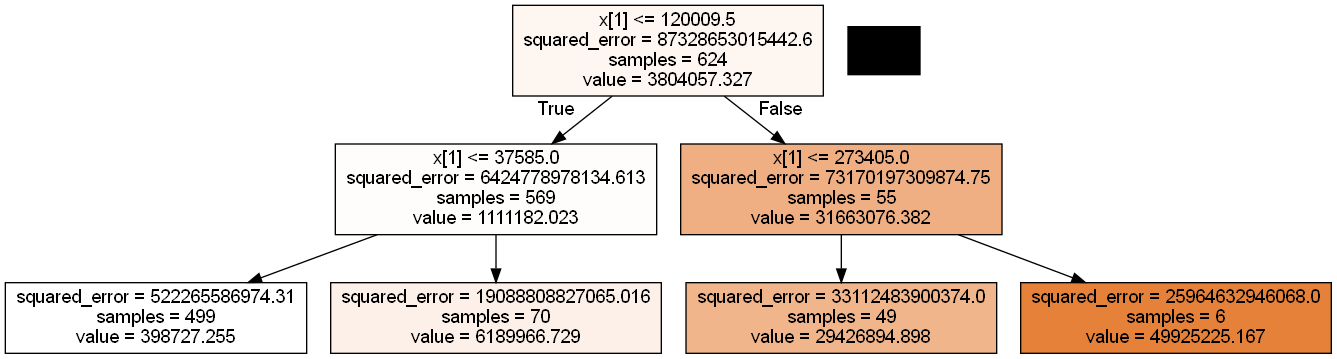

In [70]:
#Visualize the Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import pydotplus  # You need to import this library to work with Graphviz
from IPython.display import Image
from sklearn import tree
from io import StringIO

#Create a StringIO object to hold the visualization
dot_data = StringIO()

#Export the Decision Tree as a Graphviz dot file
export_graphviz(Decision_Regressor, out_file=dot_data, filled=True)

#Use pydotplus to create an image from the dot file
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#Create an Image from the graph
Image(graph.create_png())

# Regression Modelling using labeled encoded data for data with no feature scaling using hyperparameter tuning

In [71]:
#Define models with their respective parameter grids for hyperparameter tuning
models_with_tuning = [
    ('Ridge Regression', Ridge(), {'alpha': [0.1, 1.0, 10]}),
    ('Lasso Regression', Lasso(), {'alpha': [0.0001, 0.01, 1.0]}),
    ('Support Vector Regression', SVR(), {'C': [0.01,0.1,1,10,100,1000], 'gamma': [0.01,0.1,0.01,0.001,0.001]})
]

#Train and evaluate each model using GridSearchCV
for name, model, param_grid in models_with_tuning:
    grid = GridSearchCV(model, param_grid, verbose =4)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} - R-squared tuned: {r2}, Best Params: {grid.best_params_}")


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .........................alpha=0.1;, score=0.905 total time=   0.0s
[CV 2/5] END .........................alpha=0.1;, score=0.898 total time=   0.0s
[CV 3/5] END .........................alpha=0.1;, score=0.921 total time=   0.0s
[CV 4/5] END .........................alpha=0.1;, score=0.944 total time=   0.0s
[CV 5/5] END .........................alpha=0.1;, score=0.914 total time=   0.0s
[CV 1/5] END .........................alpha=1.0;, score=0.905 total time=   0.0s
[CV 2/5] END .........................alpha=1.0;, score=0.898 total time=   0.0s
[CV 3/5] END .........................alpha=1.0;, score=0.921 total time=   0.0s
[CV 4/5] END .........................alpha=1.0;, score=0.944 total time=   0.0s
[CV 5/5] END .........................alpha=1.0;, score=0.914 total time=   0.0s
[CV 1/5] END ..........................alpha=10;, score=0.905 total time=   0.0s
[CV 2/5] END ..........................alpha=10;,

[CV 4/5] END .................C=1, gamma=0.001;, score=-0.134 total time=   0.0s
[CV 5/5] END .................C=1, gamma=0.001;, score=-0.146 total time=   0.0s
[CV 1/5] END .................C=1, gamma=0.001;, score=-0.120 total time=   0.0s
[CV 2/5] END .................C=1, gamma=0.001;, score=-0.171 total time=   0.0s
[CV 3/5] END .................C=1, gamma=0.001;, score=-0.204 total time=   0.0s
[CV 4/5] END .................C=1, gamma=0.001;, score=-0.134 total time=   0.0s
[CV 5/5] END .................C=1, gamma=0.001;, score=-0.146 total time=   0.0s
[CV 1/5] END .................C=10, gamma=0.01;, score=-0.120 total time=   0.0s
[CV 2/5] END .................C=10, gamma=0.01;, score=-0.171 total time=   0.0s
[CV 3/5] END .................C=10, gamma=0.01;, score=-0.204 total time=   0.0s
[CV 4/5] END .................C=10, gamma=0.01;, score=-0.134 total time=   0.0s
[CV 5/5] END .................C=10, gamma=0.01;, score=-0.146 total time=   0.0s
[CV 1/5] END ...............

# Regression Modelling using labeled encoded data for data with standardization

In [72]:
#Split into dependent and independent variables
y = transport_data.iloc[:, 4].values
X = transport_data.drop(['Number of Passengers', 'tra_cov','aircraft','distance'], axis=1).values


# Split the data into features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [73]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#Creating a StandardScaler instance
scaler = StandardScaler()

#Scaling your training and test data
X_standardised_train = scaler.fit_transform(X_train)
X_standardised_test = scaler.transform(X_test)

# Regression Modelling using labeled encoded data for standardised data

In [74]:
#Define the models
models_standardised = [
    ('Linear Regression', LinearRegression()),
    ('Decision_Regressor', DecisionTreeRegressor(max_depth=2, random_state=0)),
    ('Ridge Regression alpha=10', Ridge(alpha=10)),
    ('Ridge Regression alpha=0.1', Ridge(alpha=0.1)),
    ('Ridge Regression alpha=1', Ridge(alpha=1)),    
    ('Lasso Regression alpha=1', Lasso(alpha=1)),
    ('Lasso Regression alpha=0.01', Lasso(alpha=0.01)),
    ('Lasso Regression alpha=0.0001', Lasso(alpha=0.0001)),
    ('ElasticNet Regression alpha = 0.01', ElasticNet(alpha = 0.01)),
    ('Random Forest Regression', RandomForestRegressor(n_estimators=1000, random_state=0)),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor(algorithm='auto', leaf_size=30,metric='minkowski',
                                   metric_params=None, n_jobs=1, n_neighbors=5))
]

#Train and evaluate each model
for name, model in models_standardised:
    model.fit(X_standardised_train, y_train)
    y_pred_standardised = model.predict(X_standardised_test)
    r2_standardised = r2_score(y_test, y_pred_standardised)
    print(f"{name} - R-squared (standardised scaled): {r2_standardised}")

Linear Regression - R-squared (standardised scaled): 0.9026383415804882
Decision_Regressor - R-squared (standardised scaled): 0.8936760367020835
Ridge Regression alpha=10 - R-squared (standardised scaled): 0.9017481056359318
Ridge Regression alpha=0.1 - R-squared (standardised scaled): 0.9026315812150355
Ridge Regression alpha=1 - R-squared (standardised scaled): 0.9025687184346772
Lasso Regression alpha=1 - R-squared (standardised scaled): 0.9026383561865126
Lasso Regression alpha=0.01 - R-squared (standardised scaled): 0.9026383417430381
Lasso Regression alpha=0.0001 - R-squared (standardised scaled): 0.9026383415814277
ElasticNet Regression alpha = 0.01 - R-squared (standardised scaled): 0.9024064576251216
Random Forest Regression - R-squared (standardised scaled): 0.9779500270439709
Support Vector Regression - R-squared (standardised scaled): -0.14225127680860594
K-Nearest Neighbors Regression - R-squared (standardised scaled): 0.9780915910349967


# Regression Modelling using labeled encoded data for standardised data  using hyperparameter tuning

In [75]:
#Define models with their respective parameter grids for hyperparameter tuning
models_with_tuning = [
    ('Ridge Regression', Ridge(), {'alpha': [0.1, 1.0, 10]}),
    ('Lasso Regression', Lasso(), {'alpha': [0.0001, 0.01, 1.0]}),
    ('Support Vector Regression', SVR(), {'C': [0.01,0.1,1,10,100,1000], 'gamma': [0.01,0.1,0.01,0.001,0.001]})
]

#Train and evaluate each model using GridSearchCV
for name, model, param_grid in models_with_tuning:
    grid = GridSearchCV(model, param_grid, verbose =4)
    grid.fit(X_standardised_train, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_standardised_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} - R-squared tuned: {r2}, Best Params: {grid.best_params_}")


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .........................alpha=0.1;, score=0.929 total time=   0.0s
[CV 2/5] END .........................alpha=0.1;, score=0.916 total time=   0.0s
[CV 3/5] END .........................alpha=0.1;, score=0.919 total time=   0.0s
[CV 4/5] END .........................alpha=0.1;, score=0.909 total time=   0.0s
[CV 5/5] END .........................alpha=0.1;, score=0.934 total time=   0.0s
[CV 1/5] END .........................alpha=1.0;, score=0.929 total time=   0.0s
[CV 2/5] END .........................alpha=1.0;, score=0.916 total time=   0.0s
[CV 3/5] END .........................alpha=1.0;, score=0.920 total time=   0.0s
[CV 4/5] END .........................alpha=1.0;, score=0.909 total time=   0.0s
[CV 5/5] END .........................alpha=1.0;, score=0.934 total time=   0.0s
[CV 1/5] END ..........................alpha=10;, score=0.927 total time=   0.0s
[CV 2/5] END ..........................alpha=10;,

[CV 5/5] END .................C=1, gamma=0.001;, score=-0.200 total time=   0.0s
[CV 1/5] END .................C=1, gamma=0.001;, score=-0.111 total time=   0.0s
[CV 2/5] END .................C=1, gamma=0.001;, score=-0.193 total time=   0.0s
[CV 3/5] END .................C=1, gamma=0.001;, score=-0.161 total time=   0.0s
[CV 4/5] END .................C=1, gamma=0.001;, score=-0.091 total time=   0.0s
[CV 5/5] END .................C=1, gamma=0.001;, score=-0.200 total time=   0.0s
[CV 1/5] END .................C=10, gamma=0.01;, score=-0.111 total time=   0.0s
[CV 2/5] END .................C=10, gamma=0.01;, score=-0.193 total time=   0.0s
[CV 3/5] END .................C=10, gamma=0.01;, score=-0.161 total time=   0.0s
[CV 4/5] END .................C=10, gamma=0.01;, score=-0.091 total time=   0.0s
[CV 5/5] END .................C=10, gamma=0.01;, score=-0.200 total time=   0.0s
[CV 1/5] END ..................C=10, gamma=0.1;, score=-0.111 total time=   0.0s
[CV 2/5] END ...............

# Regression Modelling using labeled encoded data for data using normalization 

In [76]:
from sklearn.preprocessing import MinMaxScaler

#Create the minmaxscaler object
scaler = MinMaxScaler()
transport_data['Number of Flights Scaled'] = scaler.fit_transform(transport_data[['Number of Flights']])

In [77]:
transport_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tra_cov                   780 non-null    object 
 1   aircraft                  780 non-null    object 
 2   distance                  780 non-null    object 
 3   TIME_PERIOD               780 non-null    int64  
 4   Number of Passengers      780 non-null    int64  
 5   Number of Flights         780 non-null    int64  
 6   tracov_encoded            780 non-null    int32  
 7   aircraft_encoded          780 non-null    int32  
 8   distance_encoded          780 non-null    int32  
 9   Number of Flights Scaled  780 non-null    float64
dtypes: float64(1), int32(3), int64(3), object(3)
memory usage: 51.9+ KB


In [78]:
#Split into dependent and independent variables
y = transport_data.iloc[:, 4].values
X = transport_data.drop(['Number of Passengers', 'tra_cov','aircraft','distance','Number of Flights'], axis=1).values


#Split the data into features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Regression Modelling using labeled encoded data for normalized data

In [79]:
#Define the models
models_normalized = [
    ('Linear Regression', LinearRegression()),
    ('Decision_Regressor', DecisionTreeRegressor(max_depth=2, random_state=0)),
    ('Ridge Regression alpha=10', Ridge(alpha=10)),
    ('Ridge Regression alpha=0.1', Ridge(alpha=0.1)),
    ('Ridge Regression alpha=1', Ridge(alpha=1)),    
    ('Lasso Regression alpha=1', Lasso(alpha=1)),
    ('Lasso Regression alpha=0.01', Lasso(alpha=0.01)),
    ('Lasso Regression alpha=0.0001', Lasso(alpha=0.0001)),
    ('ElasticNet Regression alpha = 0.01', ElasticNet(alpha = 0.01)),
    ('Random Forest Regression', RandomForestRegressor(n_estimators=1000, random_state=0)),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor(algorithm='auto', leaf_size=30,metric='minkowski',
                                   metric_params=None, n_jobs=1, n_neighbors=5))
]

#Train and evaluate each model
for name, model in models_normalized:
    model.fit(X_train, y_train)
    y_pred_normalised = model.predict(X_test)
    r2_normalised = r2_score(y_test, y_pred_normalised)
    print(f"{name} - R-squared (normalised : {r2_normalised}")
    

Linear Regression - R-squared (normalised : 0.9224575420929496
Decision_Regressor - R-squared (normalised : 0.9043041038268194
Ridge Regression alpha=10 - R-squared (normalised : 0.8636268890238767
Ridge Regression alpha=0.1 - R-squared (normalised : 0.9231755812668907
Ridge Regression alpha=1 - R-squared (normalised : 0.927290619734585
Lasso Regression alpha=1 - R-squared (normalised : 0.9224576513014997
Lasso Regression alpha=0.01 - R-squared (normalised : 0.9224575431852318
Lasso Regression alpha=0.0001 - R-squared (normalised : 0.9224575421038748
ElasticNet Regression alpha = 0.01 - R-squared (normalised : 0.924470653530563
Random Forest Regression - R-squared (normalised : 0.9925488766084806
Support Vector Regression - R-squared (normalised : -0.14978232312419126
K-Nearest Neighbors Regression - R-squared (normalised : 0.6825093029045598


# Regression Modelling using labeled encoded data for normalized data  using hyperparameter tuning

In [80]:
#Define models with their respective parameter grids for hyperparameter tuning
models_with_tuning = [
    ('Ridge Regression', Ridge(), {'alpha': [0.1, 1.0, 10]}),
    ('Lasso Regression', Lasso(), {'alpha': [0.0001, 0.01, 1.0]}),
    ('Support Vector Regression', SVR(), {'C': [0.01,0.1,1,10,100,1000], 'gamma': [0.01,0.1,0.01,0.001,0.001]})
]

#Train and evaluate each model using GridSearchCV
for name, model, param_grid in models_with_tuning:
    grid = GridSearchCV(model, param_grid, verbose =4)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} - R-squared tuned: {r2}, Best Params: {grid.best_params_}")


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .........................alpha=0.1;, score=0.911 total time=   0.0s
[CV 2/5] END .........................alpha=0.1;, score=0.924 total time=   0.0s
[CV 3/5] END .........................alpha=0.1;, score=0.947 total time=   0.0s
[CV 4/5] END .........................alpha=0.1;, score=0.897 total time=   0.0s
[CV 5/5] END .........................alpha=0.1;, score=0.913 total time=   0.0s
[CV 1/5] END .........................alpha=1.0;, score=0.903 total time=   0.0s
[CV 2/5] END .........................alpha=1.0;, score=0.921 total time=   0.0s
[CV 3/5] END .........................alpha=1.0;, score=0.941 total time=   0.0s
[CV 4/5] END .........................alpha=1.0;, score=0.895 total time=   0.0s
[CV 5/5] END .........................alpha=1.0;, score=0.919 total time=   0.0s
[CV 1/5] END ..........................alpha=10;, score=0.766 total time=   0.0s
[CV 2/5] END ..........................alpha=10;,

[CV 3/5] END .................C=1, gamma=0.001;, score=-0.144 total time=   0.0s
[CV 4/5] END .................C=1, gamma=0.001;, score=-0.134 total time=   0.0s
[CV 5/5] END .................C=1, gamma=0.001;, score=-0.128 total time=   0.0s
[CV 1/5] END .................C=1, gamma=0.001;, score=-0.142 total time=   0.0s
[CV 2/5] END .................C=1, gamma=0.001;, score=-0.167 total time=   0.0s
[CV 3/5] END .................C=1, gamma=0.001;, score=-0.144 total time=   0.0s
[CV 4/5] END .................C=1, gamma=0.001;, score=-0.134 total time=   0.0s
[CV 5/5] END .................C=1, gamma=0.001;, score=-0.128 total time=   0.0s
[CV 1/5] END .................C=10, gamma=0.01;, score=-0.142 total time=   0.0s
[CV 2/5] END .................C=10, gamma=0.01;, score=-0.167 total time=   0.0s
[CV 3/5] END .................C=10, gamma=0.01;, score=-0.144 total time=   0.0s
[CV 4/5] END .................C=10, gamma=0.01;, score=-0.134 total time=   0.0s
[CV 5/5] END ...............

In [81]:
#Split into dependent and independent variables
y = transport_data.iloc[:, 4].values
X = transport_data.drop(['Number of Passengers', 'tra_cov','aircraft','distance'], axis=1).values

# Creating a Dashboard 

In [82]:
import dash
from dash import html, dcc
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Define models with their respective hyperparameters
models_labeled = [
    ('Ridge Regression alpha=10', Ridge(alpha=10)),
    ('Ridge Regression alpha=0.1', Ridge(alpha=0.1)),
    ('Ridge Regression alpha=1.0', Ridge(alpha=1.0)),
    ('Lasso Regression alpha=0.0001', Lasso(alpha=0.0001)),
    ('Lasso Regression alpha=0.01', Lasso(alpha=0.01)),
    ('Lasso Regression alpha=1.0', Lasso(alpha=1.0)),
    ('ElasticNet Regression alpha = 0.01', ElasticNet(alpha=0.01)),
    ('Random Forest Regression', RandomForestRegressor(n_estimators=1000, random_state=0)),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor(n_neighbors=5))
]

#Train and evaluate each model
results = []
for name, model in models_labeled:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results.append((name, r2))

#Prepare results for visualization
results_df = pd.DataFrame(results, columns=['Model', 'R-squared Score'])

# Filter data for National travel coverage category
flight_data_NAT = transport_data[transport_data['tra_cov'] == 'NAT']

#Calculate the most common and least common aircraft for National Transport
most_common_aircraft_nat = flight_data_NAT['aircraft'].value_counts().idxmax()
least_common_aircraft_nat = flight_data_NAT['aircraft'].value_counts().idxmin()

#Create the most and least common aircraft information for National Transport
most_common_info_nat = flight_data_NAT[flight_data_NAT['aircraft'] == most_common_aircraft_nat]
least_common_info_nat = flight_data_NAT[flight_data_NAT['aircraft'] == least_common_aircraft_nat]

#Filter data for International Transport - travel coverage category
flight_data_INT = transport_data[transport_data['tra_cov'] == 'INTL']

#Calculate the most common and least common aircraft for International Transport
most_common_aircraft_int = flight_data_INT['aircraft'].value_counts().idxmax()
least_common_aircraft_int = flight_data_INT['aircraft'].value_counts().idxmin()

#Create the most and least common aircraft information for International Transport
most_common_info_int = flight_data_INT[flight_data_INT['aircraft'] == most_common_aircraft_int]
least_common_info_int = flight_data_INT[flight_data_INT['aircraft'] == least_common_aircraft_int]

#Create the Dash app
app = dash.Dash(__name__)

#Layout of the dashboard
app.layout = html.Div([
    html.H1("Transport Planning Dashboard"),
    
    html.H2("Most Common Aircraft for National Transport:"),
    html.P(f"{most_common_aircraft_nat}"),
    dcc.Graph(
        figure=px.bar(most_common_info_nat, x='distance', y='Number of Flights',
                      facet_col='aircraft', animation_frame='TIME_PERIOD',
                      title=f'Trend for {most_common_aircraft_nat} - National Transport')
    ),
    
    html.H2("Least Common Aircraft for National Transport:"),
    html.P(f"{least_common_aircraft_nat}"),
    dcc.Graph(
        figure=px.bar(least_common_info_nat, x='distance', y='Number of Flights',
                      facet_col='aircraft', animation_frame='TIME_PERIOD',
                      title=f'Trend for {least_common_aircraft_nat} - National Transport')
    ),
    
    html.H2("Most Common Aircraft for International Transport:"),
    html.P(f"{most_common_aircraft_int}"),
    dcc.Graph(
        figure=px.bar(most_common_info_int, x='distance', y='Number of Flights',
                      facet_col='aircraft', animation_frame='TIME_PERIOD',
                      title=f'Trend for {most_common_aircraft_int} - International Transport')
    ),
    
    html.H2("Least Common Aircraft for International Transport:"),
    html.P(f"{least_common_aircraft_int}"),
    dcc.Graph(
        figure=px.bar(least_common_info_int, x='distance', y='Number of Flights',
                      facet_col='aircraft', animation_frame='TIME_PERIOD',
                      title=f'Trend for {least_common_aircraft_int} - International Transport')
    ),
    
    #Bar chart for model performance comparison
    dcc.Graph(
        figure=px.bar(results_df, x='Model', y='R-squared Score', title='Regression Model Performance Comparison for predicting Number of Air Passengers in Ireland')
    ),
])

if __name__ == '__main__':
    app.run_server(debug=True)

OSError: Address 'http://127.0.0.1:8050' already in use.
    Try passing a different port to run_server.